In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
passenger_2020=pd.read_csv('processed_data/Tridelta/tridelta_timeseries_2020.csv')  
passenger_2019=pd.read_csv('processed_data/Tridelta/tridelta_timeseries_2019.csv')
stops=pd.read_csv('processed_data/Tridelta/tridelta_stops.csv')
pd.to_datetime(passenger_2019['Date'], infer_datetime_format=True)  
pd.to_datetime(passenger_2020['Date'], infer_datetime_format=True)  
passenger_2020['inputDates'] = pd.to_datetime(passenger_2020['Date'])
passenger_2019['inputDates'] = pd.to_datetime(passenger_2019['Date'])
passenger_2020['dayOfWeek'] = passenger_2020['inputDates'].dt.day_name()
passenger_2019['dayOfWeek'] = passenger_2019['inputDates'].dt.day_name()
passenger_2020['Day']=np.where((passenger_2020['dayOfWeek']=='Saturday')|(passenger_2020['dayOfWeek']=='Sunday')|(passenger_2020['dayOfWeek']=='Friday'), 'weekend', 'weekday')
passenger_2019['Day']=np.where((passenger_2019['dayOfWeek']=='Saturday')|(passenger_2019['dayOfWeek']=='Sunday')|(passenger_2019['dayOfWeek']=='Friday'), 'weekend', 'weekday')

passenger_2020=passenger_2020[passenger_2020['dayOfWeek']!='Friday']
passenger_2019=passenger_2019[passenger_2019['dayOfWeek']!='Friday']

passenger_2020['Week_Number'] = passenger_2020['inputDates'].dt.strftime('%U')
passenger_2019['Week_Number'] = passenger_2019['inputDates'].dt.strftime('%U')


In [3]:
passenger_2020_weekday=passenger_2020[passenger_2020['Day']=='weekday']
passenger_2019_weekday=passenger_2019[passenger_2019['Day']=='weekday']

passenger_2020_weekend=passenger_2020[passenger_2020['Day']=='weekend']
passenger_2019_weekend=passenger_2019[passenger_2019['Day']=='weekend']

In [4]:
passenger_2020_weekday_merged=passenger_2020_weekday.merge(stops,left_on='Stop ID',right_on='stop_id')
passenger_2019_weekday_merged=passenger_2019_weekday.merge(stops,left_on='Stop ID',right_on='stop_id')

passenger_2020_weekend_merged=passenger_2020_weekend.merge(stops,left_on='Stop ID',right_on='stop_id')
passenger_2019_weekend_merged=passenger_2019_weekend.merge(stops,left_on='Stop ID',right_on='stop_id')

## Max activity 2019 & 2020

In [5]:
passenger_2020_weekday_grouped=passenger_2020_weekday_merged.groupby(['TRACTCE']).sum().reset_index()
passenger_2019_weekday_grouped=passenger_2019_weekday_merged.groupby(['TRACTCE']).sum().reset_index()
passenger_2020_weekday_grouped['max_on_off']=passenger_2020_weekday_grouped[['Passenger on','Passenger off']].max(axis=1)
passenger_2019_weekday_grouped['max_on_off']=passenger_2020_weekday_grouped[['Passenger on','Passenger off']].max(axis=1)
passenger_2020_weekday_grouped=passenger_2020_weekday_grouped[['TRACTCE','Passenger on','Passenger off','max_on_off']]
passenger_2019_weekday_grouped=passenger_2019_weekday_grouped[['TRACTCE','Passenger on','Passenger off','max_on_off']]

passenger_2020_weekend_grouped=passenger_2020_weekend_merged.groupby(['TRACTCE','Day']).sum().reset_index()
passenger_2019_weekend_grouped=passenger_2019_weekend_merged.groupby(['TRACTCE','Day']).sum().reset_index()
passenger_2020_weekend_grouped['max_on_off']=passenger_2020_weekend_grouped[['Passenger on','Passenger off']].max(axis=1)
passenger_2019_weekend_grouped['max_on_off']=passenger_2019_weekend_grouped[['Passenger on','Passenger off']].max(axis=1)
passenger_2020_weekend_grouped=passenger_2020_weekend_grouped[['TRACTCE','Passenger on','Passenger off','max_on_off']]
passenger_2019_weekend_grouped=passenger_2019_weekend_grouped[['TRACTCE','Passenger on','Passenger off','max_on_off']]

In [6]:
pass_on_week_2020=passenger_2020_weekday_grouped.sort_values(by='Passenger on',ascending=False)
tracts_pass_on_max_weekday_2020=pass_on_week_2020.iloc[0:5, 0]

pass_off_week_2020=passenger_2020_weekday_grouped.sort_values(by='Passenger off',ascending=False)
tracts_pass_off_max_weekday_2020=pass_off_week_2020.iloc[0:5, 0]

pass_on_off_week_2020=passenger_2020_weekday_grouped.sort_values(by='max_on_off',ascending=False)
tracts_pass_on_off_max_weekday_2020=pass_on_week_2020.iloc[0:5, 0]


pass_on_weekend_2020=passenger_2020_weekend_grouped.sort_values(by='Passenger on',ascending=False)
tracts_pass_on_max_weekend_2020=pass_on_weekend_2020.iloc[0:5, 0]

pass_off_weekend_2020=passenger_2020_weekend_grouped.sort_values(by='Passenger off',ascending=False)
tracts_pass_off_max_weekend_2020=pass_off_weekend_2020.iloc[0:5, 0]

pass_on_off_weekend_2020=passenger_2020_weekend_grouped.sort_values(by='max_on_off',ascending=False)
tracts_pass_on_off_max_weekend_2020=pass_on_off_weekend_2020.iloc[0:5, 0]



pass_on_week_2019=passenger_2019_weekday_grouped.sort_values(by='Passenger on',ascending=False)
tracts_pass_on_max_weekday_2019=pass_on_week_2019.iloc[0:5, 0]

pass_off_week_2019=passenger_2019_weekday_grouped.sort_values(by='Passenger off',ascending=False)
tracts_pass_off_max_weekday_2019=pass_off_week_2019.iloc[0:5, 0]

pass_on_off_week_2019=passenger_2019_weekday_grouped.sort_values(by='max_on_off',ascending=False)
tracts_pass_on_off_max_weekday_2019=pass_on_week_2019.iloc[0:5, 0]


pass_on_weekend_2019=passenger_2019_weekend_grouped.sort_values(by='Passenger on',ascending=False)
tracts_pass_on_max_weekend_2019=pass_on_weekend_2019.iloc[0:5, 0]

pass_off_weekend_2019=passenger_2019_weekend_grouped.sort_values(by='Passenger off',ascending=False)
tracts_pass_off_max_weekend_2019=pass_off_weekend_2019.iloc[0:5, 0]

pass_on_off_weekend_2019=passenger_2019_weekend_grouped.sort_values(by='max_on_off',ascending=False)
tracts_pass_on_off_max_weekend_2019=pass_on_off_weekend_2019.iloc[0:5, 0]

## Activity change overtime 

In [7]:
tracts_pass_on_max_weekday_2019_2020=pd.concat([tracts_pass_on_max_weekday_2020,tracts_pass_on_max_weekday_2019]).drop_duplicates().reset_index(drop=True)
tracts_pass_off_max_weekday_2019_2020=pd.concat([tracts_pass_off_max_weekday_2020,tracts_pass_off_max_weekday_2019]).drop_duplicates().reset_index(drop=True)
tracts_pass_on_off_max_weekday_2019_2020=pd.concat([tracts_pass_on_off_max_weekday_2020,tracts_pass_on_off_max_weekday_2019]).drop_duplicates().reset_index(drop=True)

tracts_pass_on_max_weekend_2019_2020=pd.concat([tracts_pass_on_max_weekend_2020,tracts_pass_on_max_weekend_2019]).drop_duplicates().reset_index(drop=True)
tracts_pass_off_max_weekend_2019_2020=pd.concat([tracts_pass_off_max_weekend_2020,tracts_pass_off_max_weekend_2019]).drop_duplicates().reset_index(drop=True)
tracts_pass_on_off_max_weekend_2019_2020=pd.concat([tracts_pass_on_off_max_weekend_2020,tracts_pass_on_off_max_weekend_2019]).drop_duplicates().reset_index(drop=True)


In [8]:
passenger_2020_weekday_on_max=passenger_2020_weekday_merged[passenger_2020_weekday_merged['TRACTCE'].isin(tracts_pass_on_max_weekday_2019_2020)]
passenger_2019_weekday_on_max=passenger_2019_weekday_merged[passenger_2019_weekday_merged['TRACTCE'].isin(tracts_pass_on_max_weekday_2019_2020)]

passenger_2020_weekday_off_max=passenger_2020_weekday_merged[passenger_2020_weekday_merged['TRACTCE'].isin(tracts_pass_off_max_weekday_2019_2020)]
passenger_2019_weekday_off_max=passenger_2019_weekday_merged[passenger_2019_weekday_merged['TRACTCE'].isin(tracts_pass_off_max_weekday_2019_2020)]

passenger_2020_weekday_on_off_max=passenger_2020_weekday_merged[passenger_2020_weekday_merged['TRACTCE'].isin(tracts_pass_on_off_max_weekday_2019_2020)]
passenger_2019_weekday_on_off_max=passenger_2019_weekday_merged[passenger_2019_weekday_merged['TRACTCE'].isin(tracts_pass_on_off_max_weekday_2019_2020)]


passenger_2020_weekend_on_max=passenger_2020_weekend_merged[passenger_2020_weekend_merged['TRACTCE'].isin(tracts_pass_on_max_weekend_2019_2020)]
passenger_2019_weekend_on_max=passenger_2019_weekend_merged[passenger_2019_weekend_merged['TRACTCE'].isin(tracts_pass_on_max_weekend_2019_2020)]

passenger_2020_weekend_off_max=passenger_2020_weekend_merged[passenger_2020_weekend_merged['TRACTCE'].isin(tracts_pass_off_max_weekend_2019_2020)]
passenger_2019_weekend_off_max=passenger_2019_weekend_merged[passenger_2019_weekend_merged['TRACTCE'].isin(tracts_pass_off_max_weekend_2019_2020)]

passenger_2020_weekend_on_off_max=passenger_2020_weekend_merged[passenger_2020_weekend_merged['TRACTCE'].isin(tracts_pass_on_off_max_weekend_2019_2020)]
passenger_2019_weekend_on_off_max=passenger_2019_weekend_merged[passenger_2019_weekend_merged['TRACTCE'].isin(tracts_pass_on_off_max_weekend_2019_2020)]


In [9]:
passenger_2020_weekday_on_max_grouped=passenger_2020_weekday_on_max.groupby(['TRACTCE','Week_Number']).sum().reset_index()
passenger_2019_weekday_on_max_grouped=passenger_2019_weekday_on_max.groupby(['TRACTCE','Week_Number']).sum().reset_index()

passenger_2020_weekday_off_max_grouped=passenger_2020_weekday_off_max.groupby(['TRACTCE','Week_Number']).sum().reset_index()
passenger_2019_weekday_off_max_grouped=passenger_2019_weekday_off_max.groupby(['TRACTCE','Week_Number']).sum().reset_index()

passenger_2020_weekday_on_off_max_grouped=passenger_2020_weekday_on_off_max.groupby(['TRACTCE','Week_Number']).sum().reset_index()
passenger_2019_weekday_on_off_max_grouped=passenger_2019_weekday_on_off_max.groupby(['TRACTCE','Week_Number']).sum().reset_index()

passenger_2020_weekday_on_off_max_grouped['max_on_off']=passenger_2020_weekday_on_off_max_grouped[['Passenger on','Passenger off']].max(axis=1)
passenger_2019_weekday_on_off_max_grouped['max_on_off']=passenger_2019_weekday_on_off_max_grouped[['Passenger on','Passenger off']].max(axis=1)

passenger_2020_weekend_on_max_grouped=passenger_2020_weekend_on_max.groupby(['TRACTCE','Week_Number']).sum().reset_index()
passenger_2019_weekend_on_max_grouped=passenger_2019_weekend_on_max.groupby(['TRACTCE','Week_Number']).sum().reset_index()

passenger_2020_weekend_off_max_grouped=passenger_2020_weekend_off_max.groupby(['TRACTCE','Week_Number']).sum().reset_index()
passenger_2019_weekend_off_max_grouped=passenger_2019_weekend_off_max.groupby(['TRACTCE','Week_Number']).sum().reset_index()

passenger_2020_weekend_on_off_max_grouped=passenger_2020_weekend_on_off_max.groupby(['TRACTCE','Week_Number']).sum().reset_index()
passenger_2019_weekend_on_off_max_grouped=passenger_2019_weekend_on_off_max.groupby(['TRACTCE','Week_Number']).sum().reset_index()

passenger_2020_weekend_on_off_max_grouped['max_on_off']=passenger_2020_weekend_on_off_max_grouped[['Passenger on','Passenger off']].max(axis=1)
passenger_2019_weekend_on_off_max_grouped['max_on_off']=passenger_2019_weekend_on_off_max_grouped[['Passenger on','Passenger off']].max(axis=1)


In [10]:
passenger_2020_weekday_on_max_grouped=passenger_2020_weekday_on_max_grouped[['TRACTCE','Passenger on','Week_Number']]
passenger_2020_weekday_off_max_grouped=passenger_2020_weekday_off_max_grouped[['TRACTCE','Passenger off','Week_Number']]
passenger_2020_weekday_on_off_max_grouped=passenger_2020_weekday_on_off_max_grouped[['TRACTCE','max_on_off','Week_Number']]

passenger_2019_weekday_on_max_grouped=passenger_2019_weekday_on_max_grouped[['TRACTCE','Passenger on','Week_Number']]
passenger_2019_weekday_off_max_grouped=passenger_2019_weekday_off_max_grouped[['TRACTCE','Passenger off','Week_Number']]
passenger_2019_weekday_on_off_max_grouped=passenger_2019_weekday_on_off_max_grouped[['TRACTCE','max_on_off','Week_Number']]


passenger_2020_weekend_on_max_grouped=passenger_2020_weekend_on_max_grouped[['TRACTCE','Passenger on','Week_Number']]
passenger_2020_weekend_off_max_grouped=passenger_2020_weekend_off_max_grouped[['TRACTCE','Passenger off','Week_Number']]
passenger_2020_weekend_on_off_max_grouped=passenger_2020_weekend_on_off_max_grouped[['TRACTCE','max_on_off','Week_Number']]

passenger_2019_weekend_on_max_grouped=passenger_2019_weekend_on_max_grouped[['TRACTCE','Passenger on','Week_Number']]
passenger_2019_weekend_off_max_grouped=passenger_2019_weekend_off_max_grouped[['TRACTCE','Passenger off','Week_Number']]
passenger_2019_weekend_on_off_max_grouped=passenger_2019_weekend_on_off_max_grouped[['TRACTCE','max_on_off','Week_Number']]


In [11]:
type(passenger_2020_weekday_on_max_grouped['TRACTCE'][0])

numpy.int64

[Text(0.5, 1.0, 'Weekday 2020 Passenger on by TractID')]

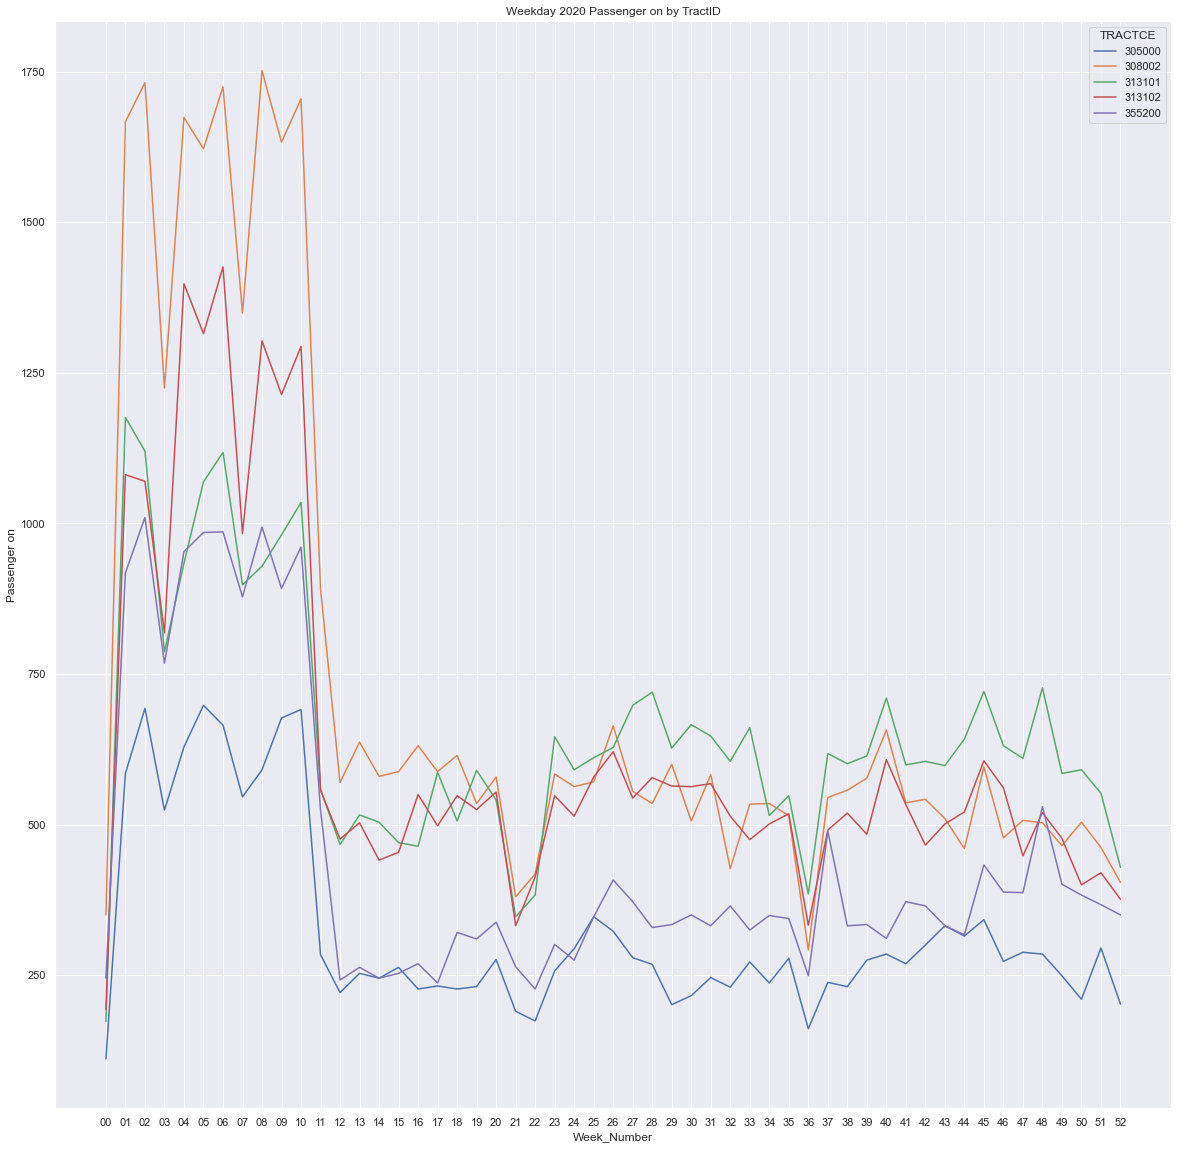

In [12]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)
sns.color_palette("hls")
passenger_2020_weekday_on_max_grouped['TRACTCE'] = passenger_2020_weekday_on_max_grouped['TRACTCE'].astype(str)
sns.lineplot(data=passenger_2020_weekday_on_max_grouped, x="Week_Number", y="Passenger on", hue="TRACTCE",legend="full").set(title='Weekday 2020 Passenger on by TractID')

[Text(0.5, 1.0, 'Weekday 2019 Passenger on by TractID')]

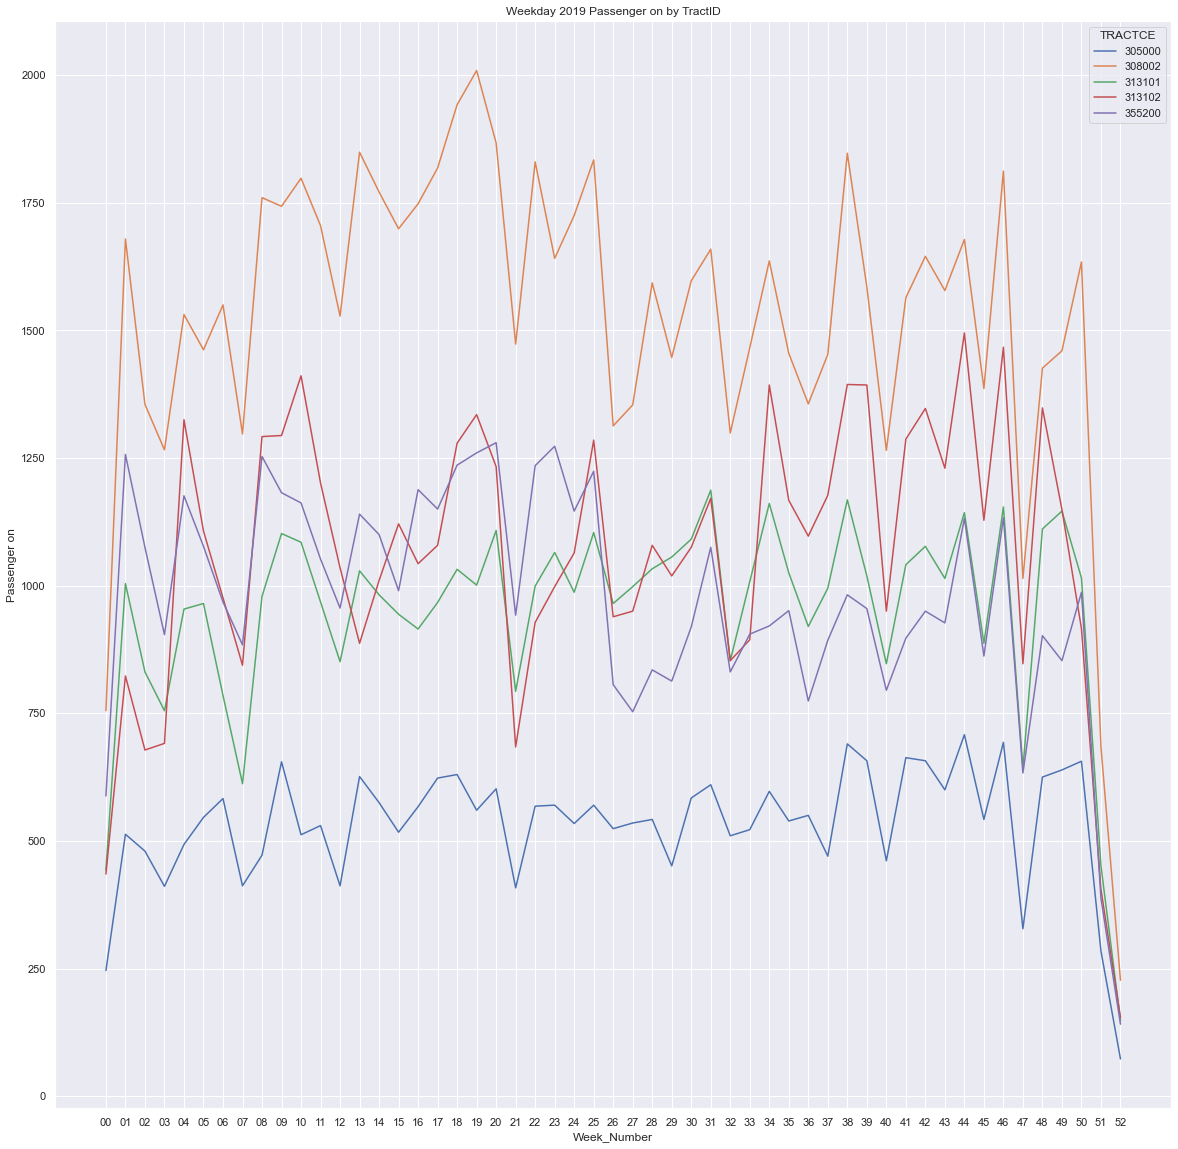

In [13]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)
sns.color_palette("hls")
passenger_2019_weekday_on_max_grouped['TRACTCE'] = passenger_2019_weekday_on_max_grouped['TRACTCE'].astype(str)
sns.lineplot(data=passenger_2019_weekday_on_max_grouped, x="Week_Number", y="Passenger on", hue="TRACTCE").set(title='Weekday 2019 Passenger on by TractID')

[Text(0.5, 1.0, 'Weekday 2020 Passenger off by TractID')]

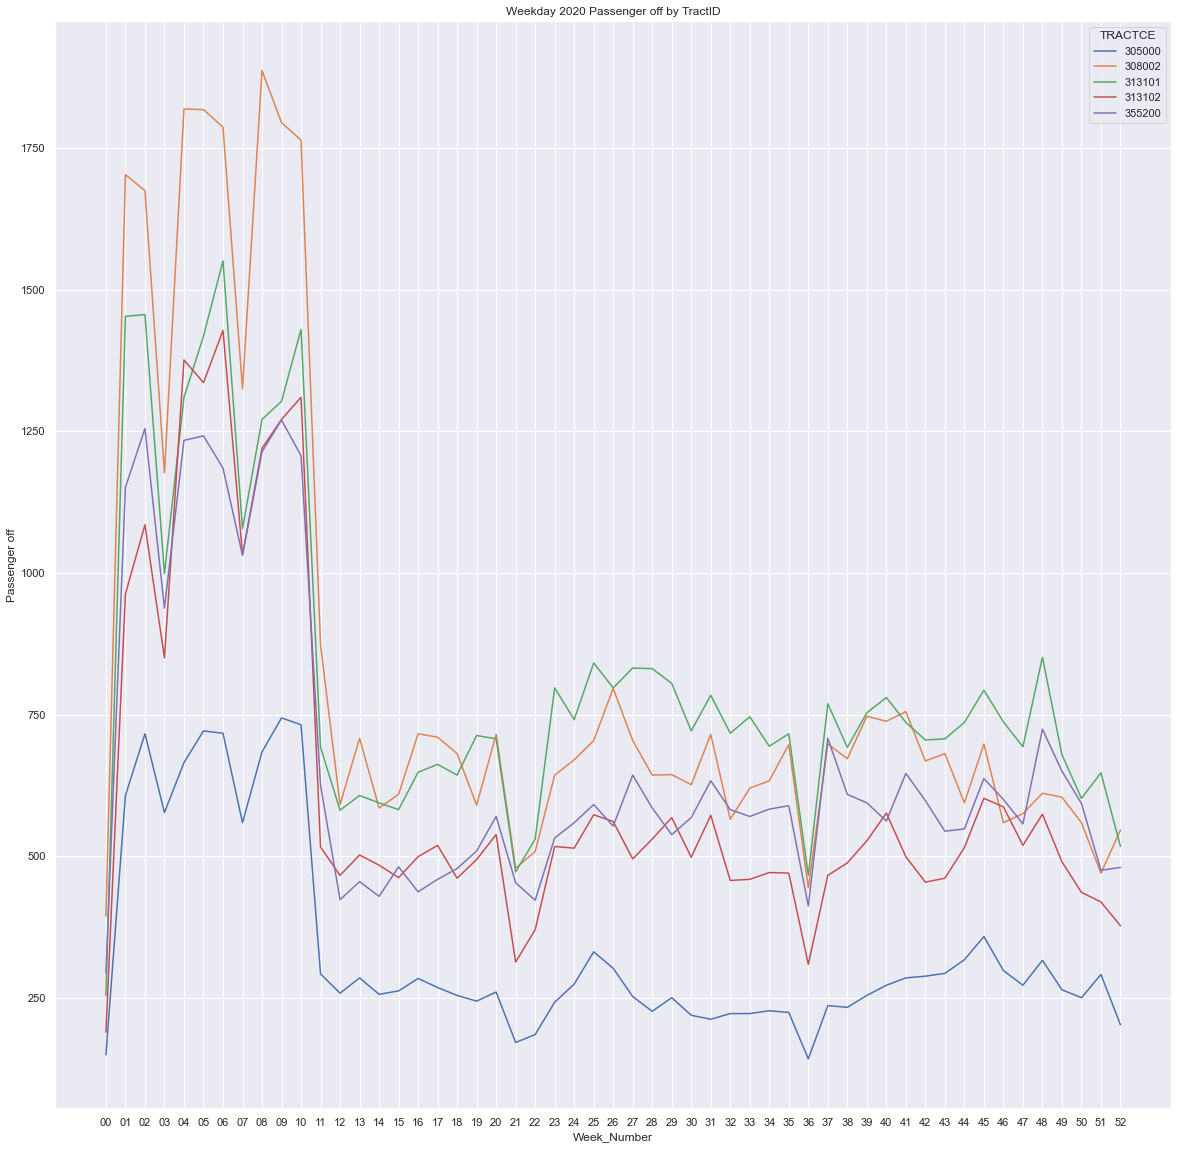

In [14]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)
sns.color_palette("hls")
passenger_2020_weekday_off_max_grouped['TRACTCE'] = passenger_2020_weekday_off_max_grouped['TRACTCE'].astype(str)
sns.lineplot(data=passenger_2020_weekday_off_max_grouped, x="Week_Number", y="Passenger off", hue="TRACTCE").set(title='Weekday 2020 Passenger off by TractID')

[Text(0.5, 1.0, 'Weekday 2019 Passenger off by TractID')]

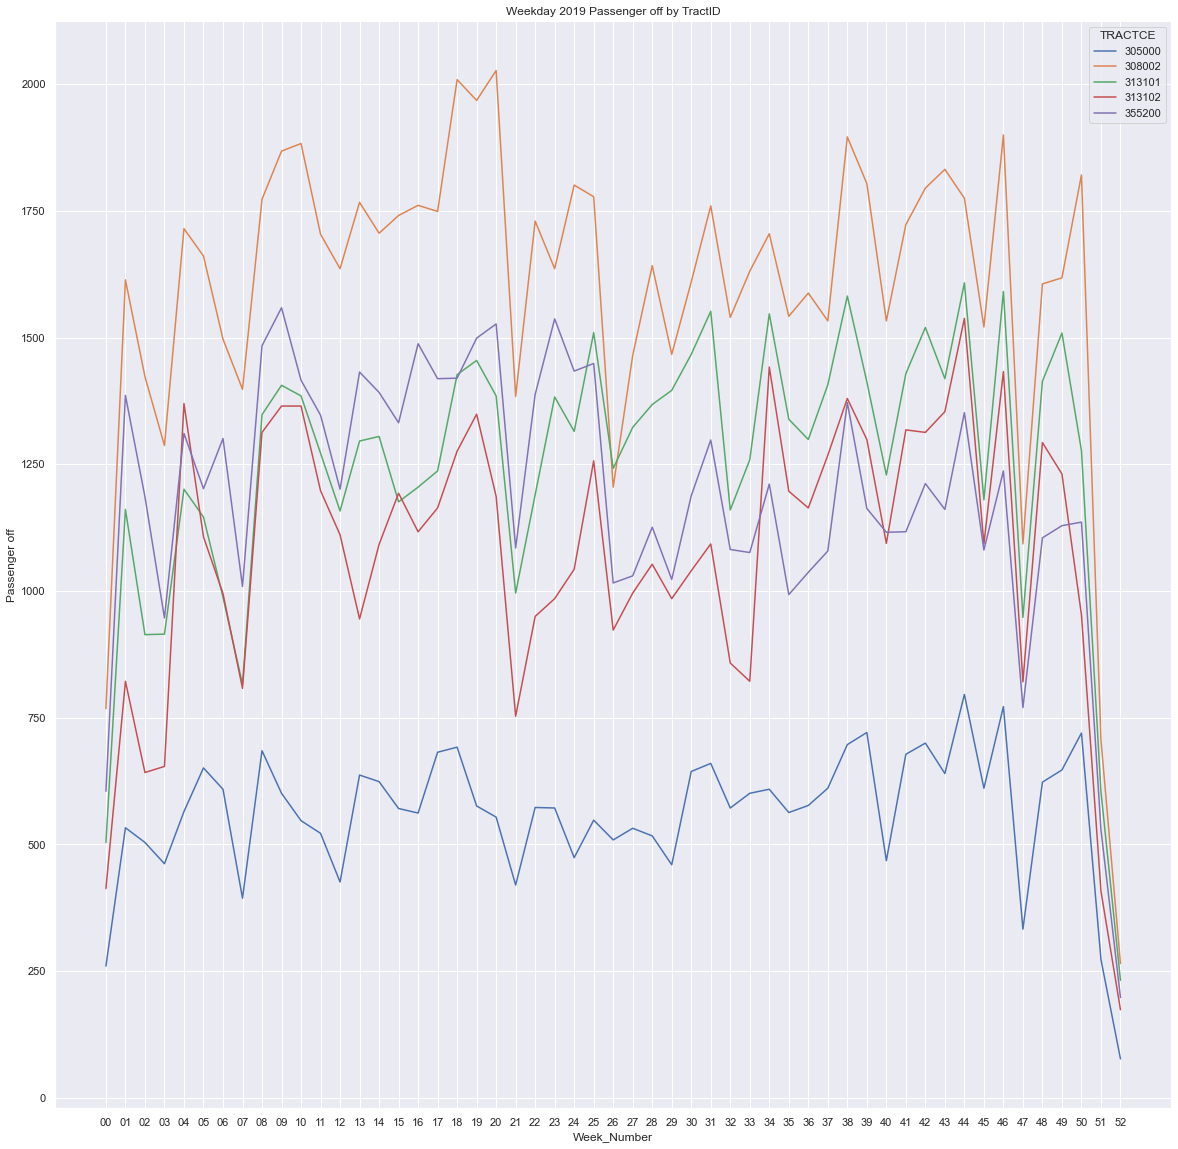

In [15]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)
sns.color_palette("hls")
passenger_2019_weekday_off_max_grouped['TRACTCE'] = passenger_2019_weekday_off_max_grouped['TRACTCE'].astype(str)
sns.lineplot(data=passenger_2019_weekday_off_max_grouped, x="Week_Number", y="Passenger off", hue="TRACTCE").set(title='Weekday 2019 Passenger off by TractID')

[Text(0.5, 1.0, 'Weekday 2020 Passenger max on/off by TractID')]

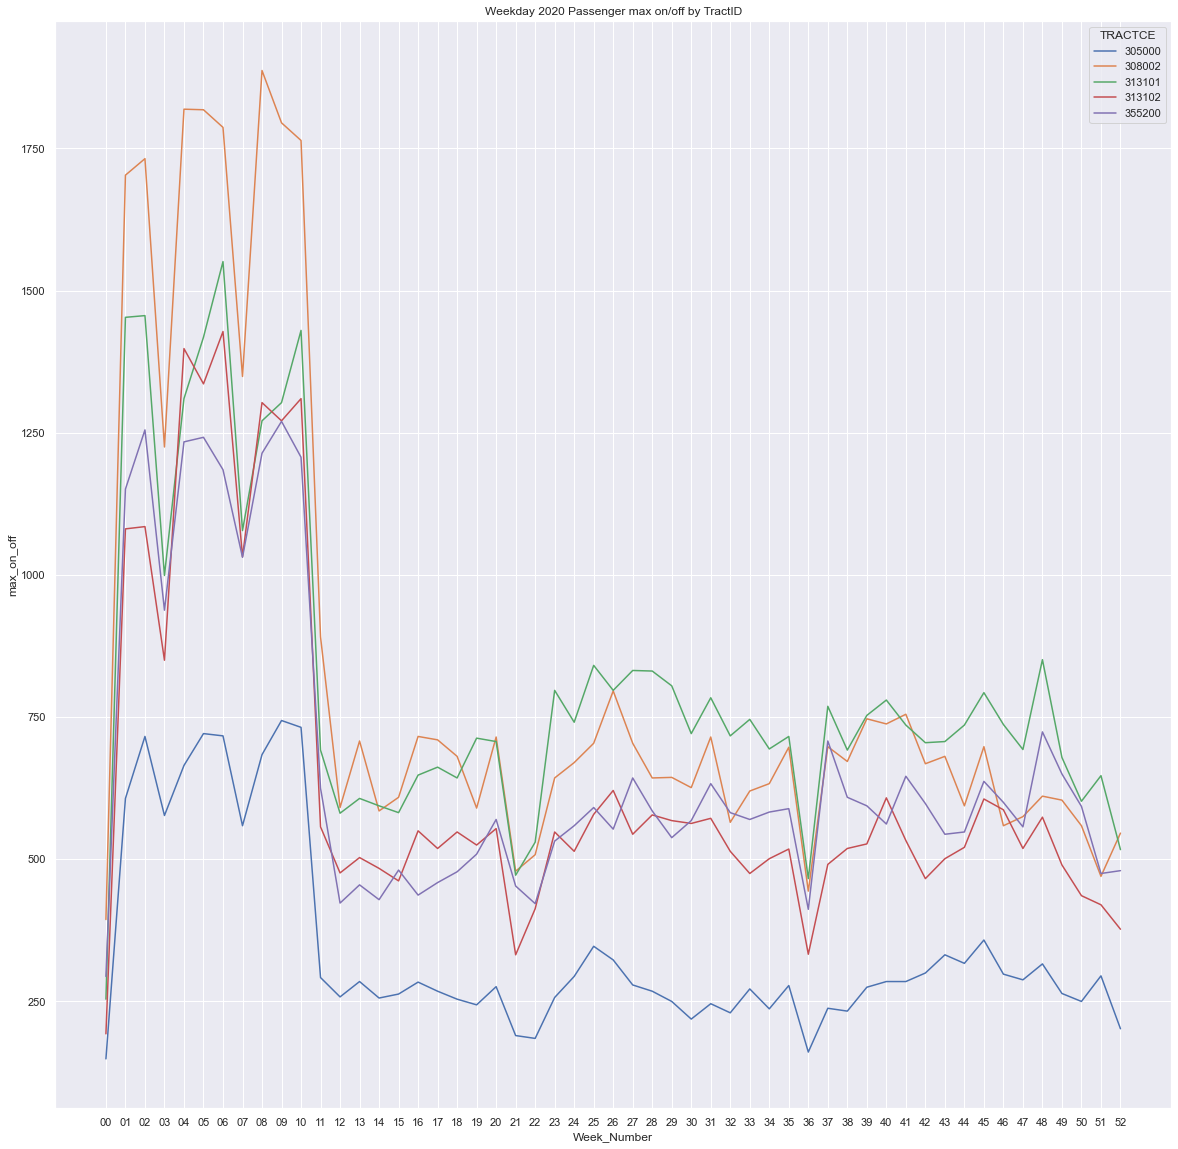

In [16]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)
sns.color_palette("hls")
passenger_2020_weekday_on_off_max_grouped['TRACTCE'] = passenger_2020_weekday_on_off_max_grouped['TRACTCE'].astype(str)
sns.lineplot(data=passenger_2020_weekday_on_off_max_grouped, x="Week_Number", y="max_on_off", hue="TRACTCE").set(title='Weekday 2020 Passenger max on/off by TractID')

[Text(0.5, 1.0, 'Weekday 2019 Passenger max on/off by TractID')]

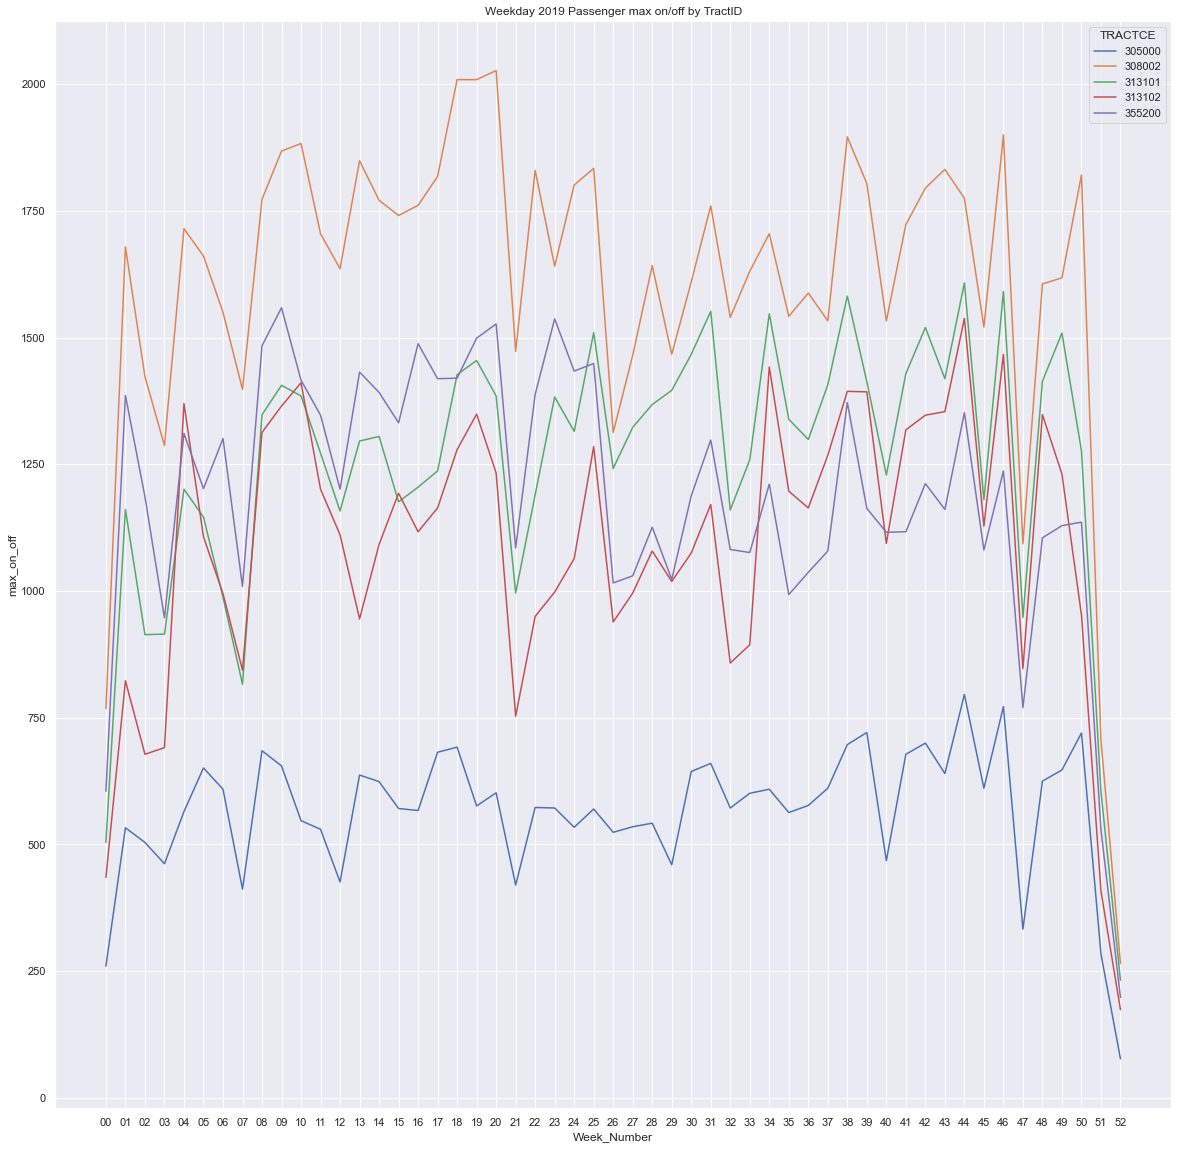

In [17]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)
sns.color_palette("hls")
passenger_2019_weekday_on_off_max_grouped['TRACTCE'] = passenger_2019_weekday_on_off_max_grouped['TRACTCE'].astype(str)
sns.lineplot(data=passenger_2019_weekday_on_off_max_grouped, x="Week_Number", y="max_on_off", hue="TRACTCE").set(title='Weekday 2019 Passenger max on/off by TractID')

[Text(0.5, 1.0, 'Weekend 2020 Passenger on by TractID')]

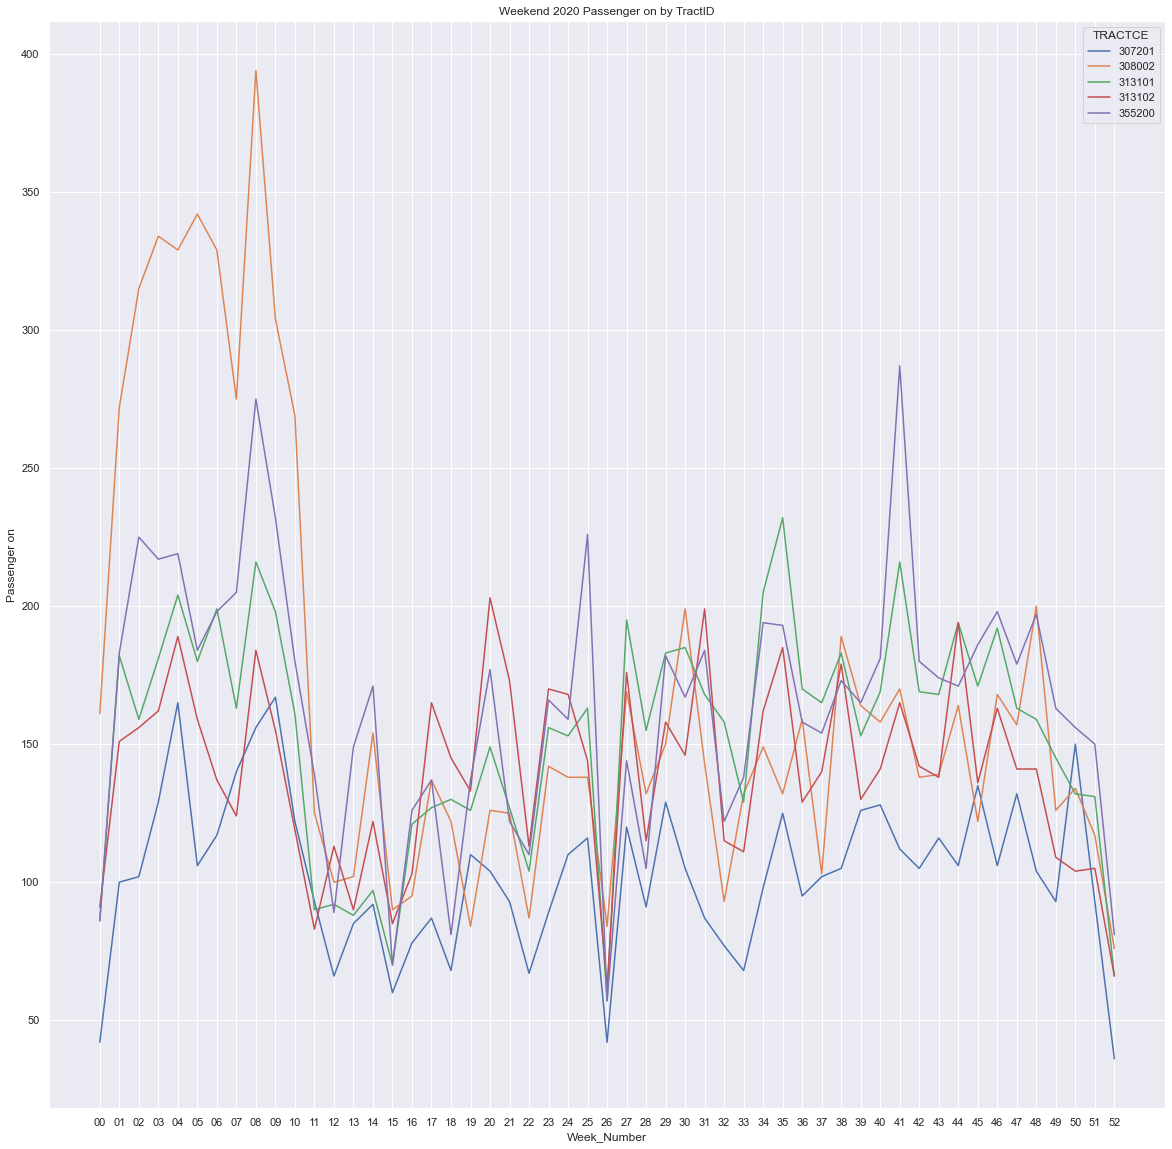

In [18]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)
sns.color_palette("hls")
passenger_2020_weekend_on_max_grouped['TRACTCE'] = passenger_2020_weekend_on_max_grouped['TRACTCE'].astype(str)
sns.lineplot(data=passenger_2020_weekend_on_max_grouped, x="Week_Number", y="Passenger on", hue="TRACTCE").set(title='Weekend 2020 Passenger on by TractID')

[Text(0.5, 1.0, 'Weekend 2019 Passenger on by TractID')]

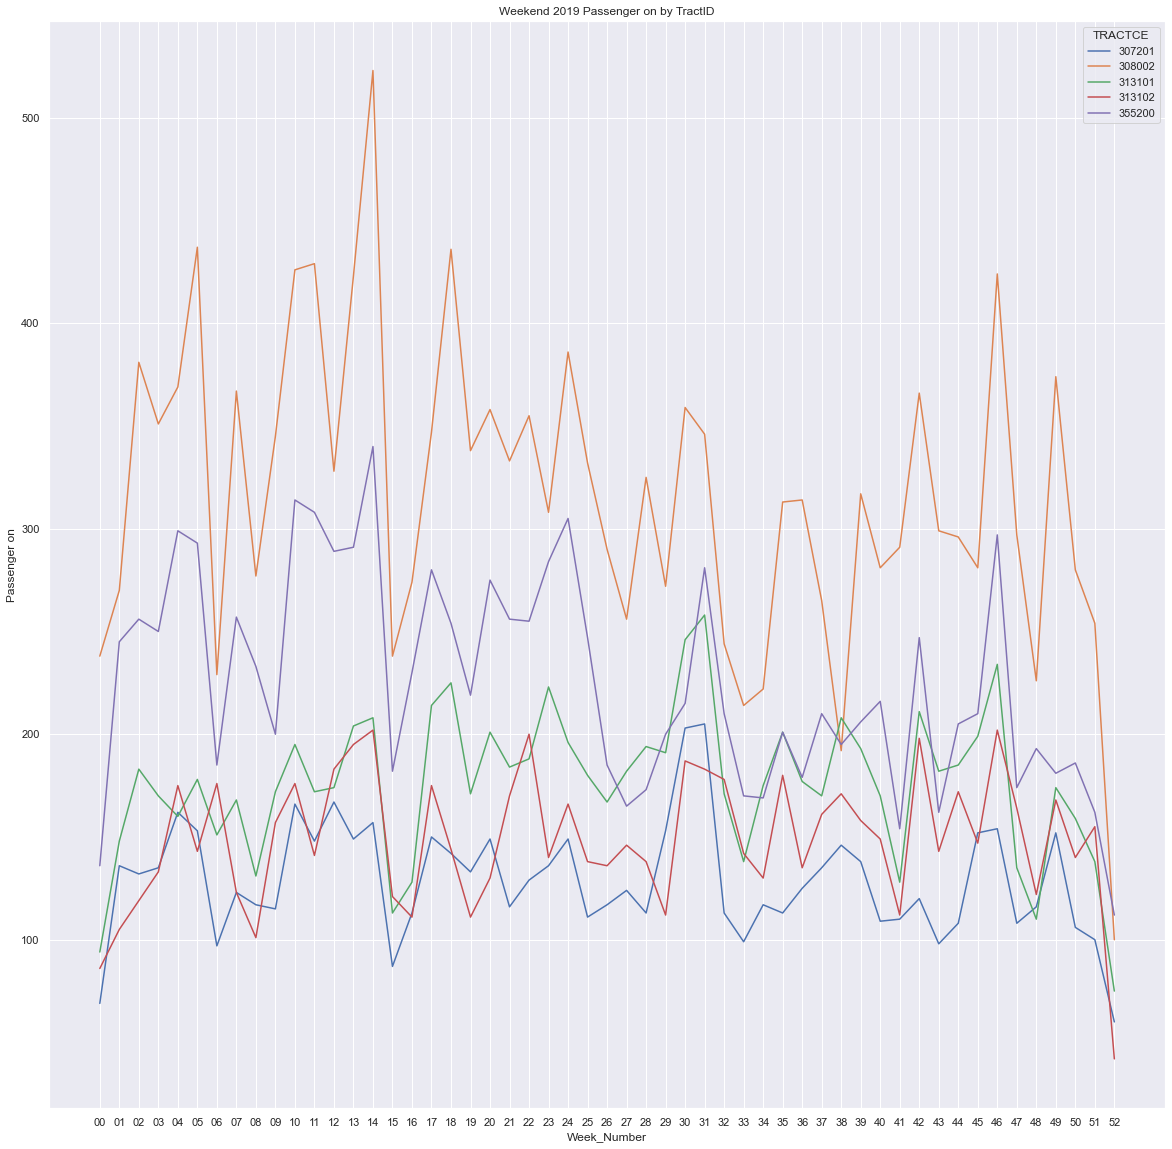

In [19]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)
sns.color_palette("hls")
passenger_2019_weekend_on_max_grouped['TRACTCE'] = passenger_2019_weekend_on_max_grouped['TRACTCE'].astype(str)
sns.lineplot(data=passenger_2019_weekend_on_max_grouped, x="Week_Number", y="Passenger on", hue="TRACTCE").set(title='Weekend 2019 Passenger on by TractID')

[Text(0.5, 1.0, 'Weekend 2020 Passenger off by TractID')]

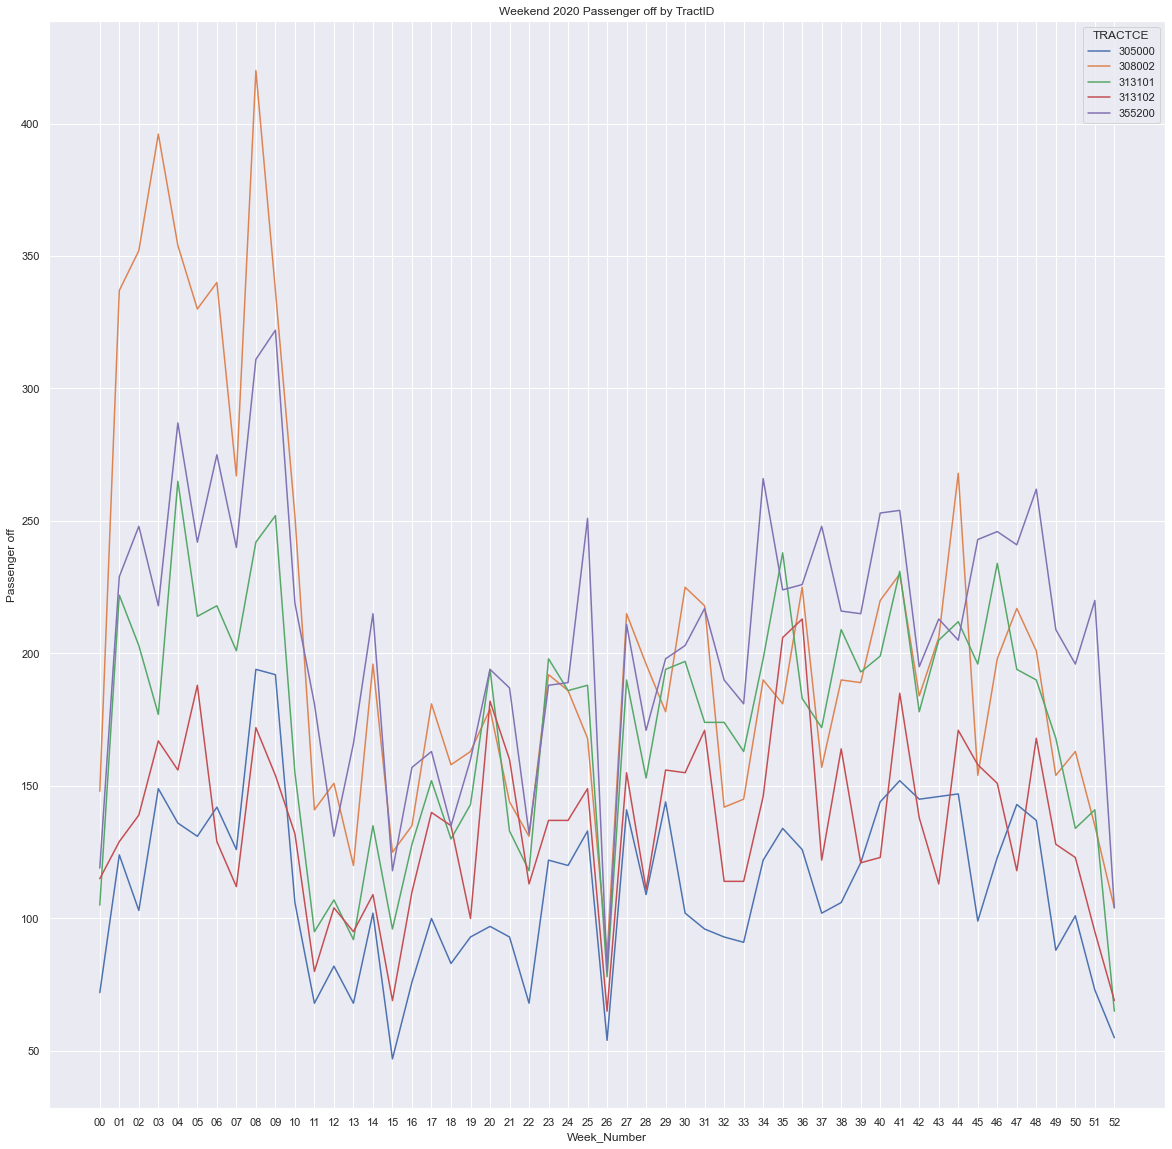

In [20]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)
sns.color_palette("hls")
passenger_2020_weekend_off_max_grouped['TRACTCE'] = passenger_2020_weekend_off_max_grouped['TRACTCE'].astype(str)
sns.lineplot(data=passenger_2020_weekend_off_max_grouped, x="Week_Number", y="Passenger off", hue="TRACTCE").set(title='Weekend 2020 Passenger off by TractID')

[Text(0.5, 1.0, 'Weekend 2019 Passenger off by TractID')]

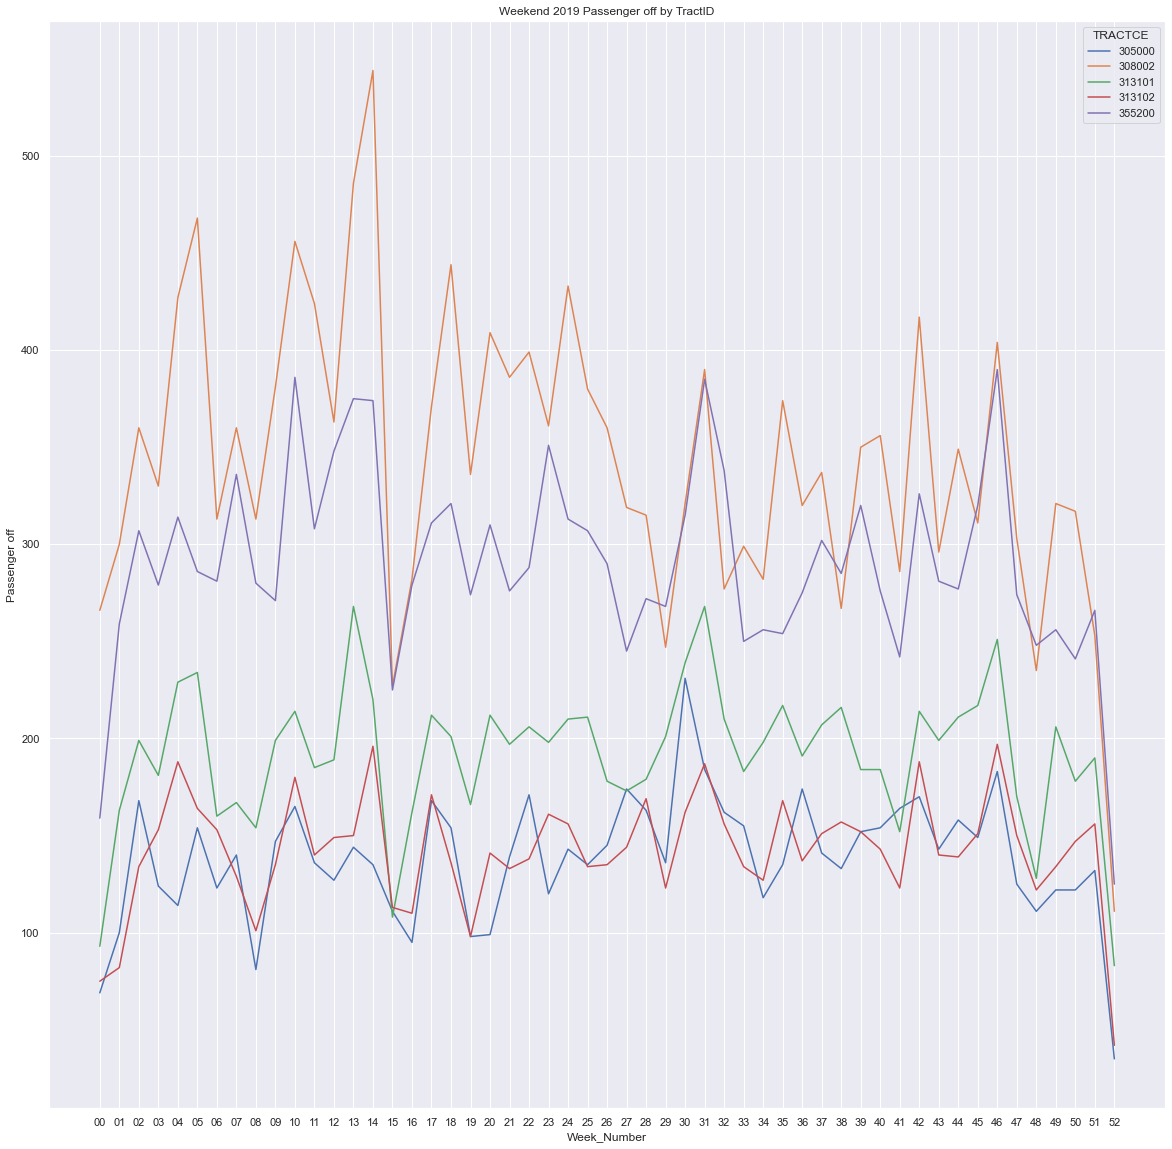

In [21]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)
sns.color_palette("hls")
passenger_2019_weekend_off_max_grouped['TRACTCE'] = passenger_2019_weekend_off_max_grouped['TRACTCE'].astype(str)
sns.lineplot(data=passenger_2019_weekend_off_max_grouped, x="Week_Number", y="Passenger off", hue="TRACTCE").set(title='Weekend 2019 Passenger off by TractID')

[Text(0.5, 1.0, 'Weekend 2020 Passenger max on/off by TractID')]

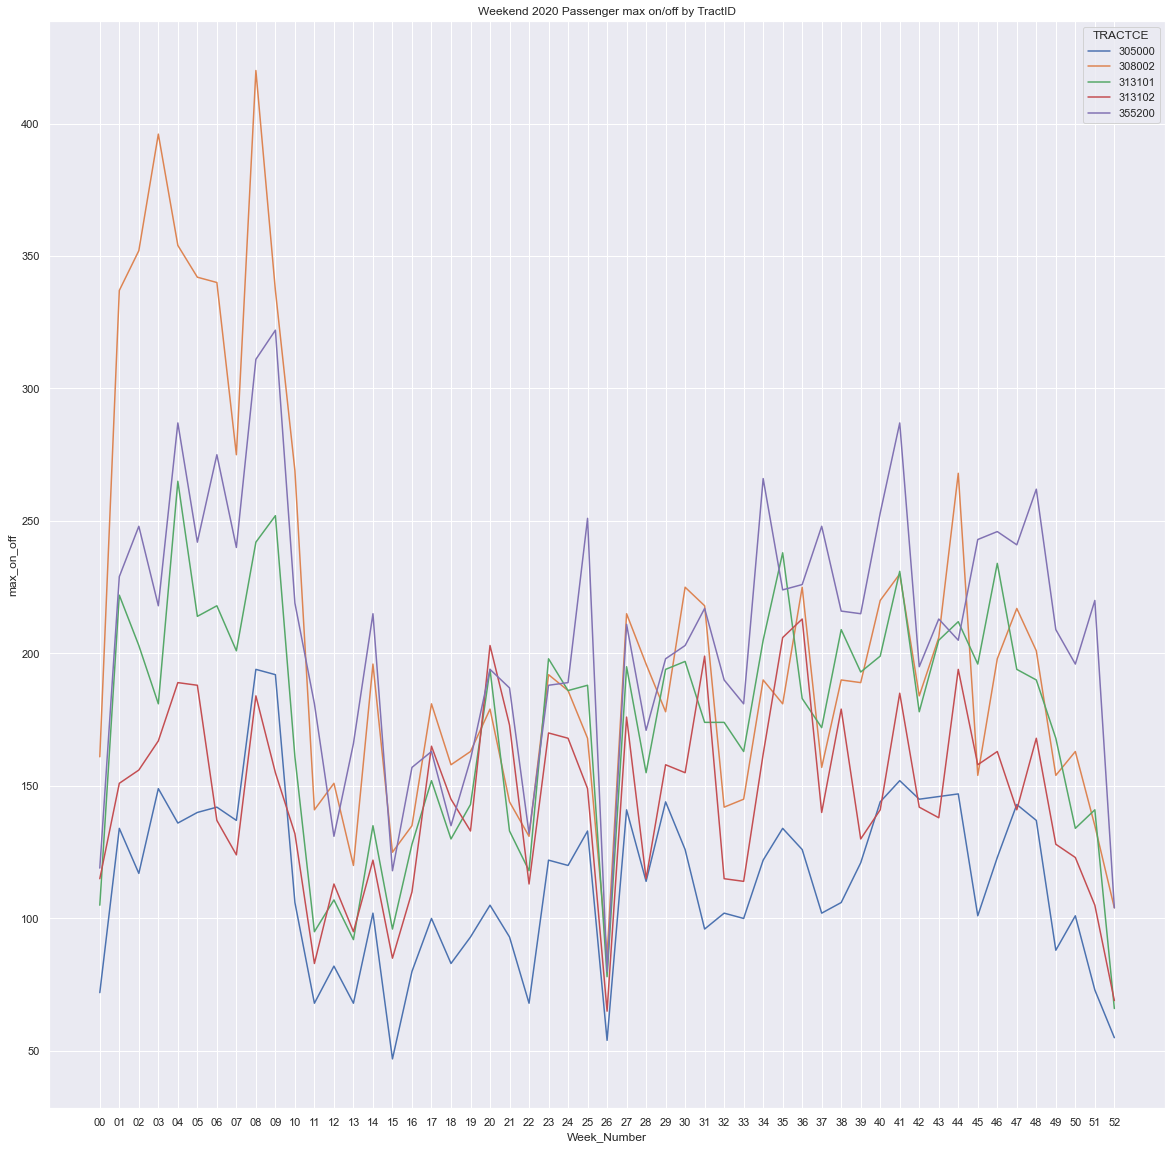

In [22]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)
sns.color_palette("hls")
passenger_2020_weekend_on_off_max_grouped['TRACTCE'] = passenger_2020_weekend_on_off_max_grouped['TRACTCE'].astype(str)
sns.lineplot(data=passenger_2020_weekend_on_off_max_grouped, x="Week_Number", y="max_on_off", hue="TRACTCE").set(title='Weekend 2020 Passenger max on/off by TractID')

[Text(0.5, 1.0, 'Weekend 2019 Passenger max on/off by TractID')]

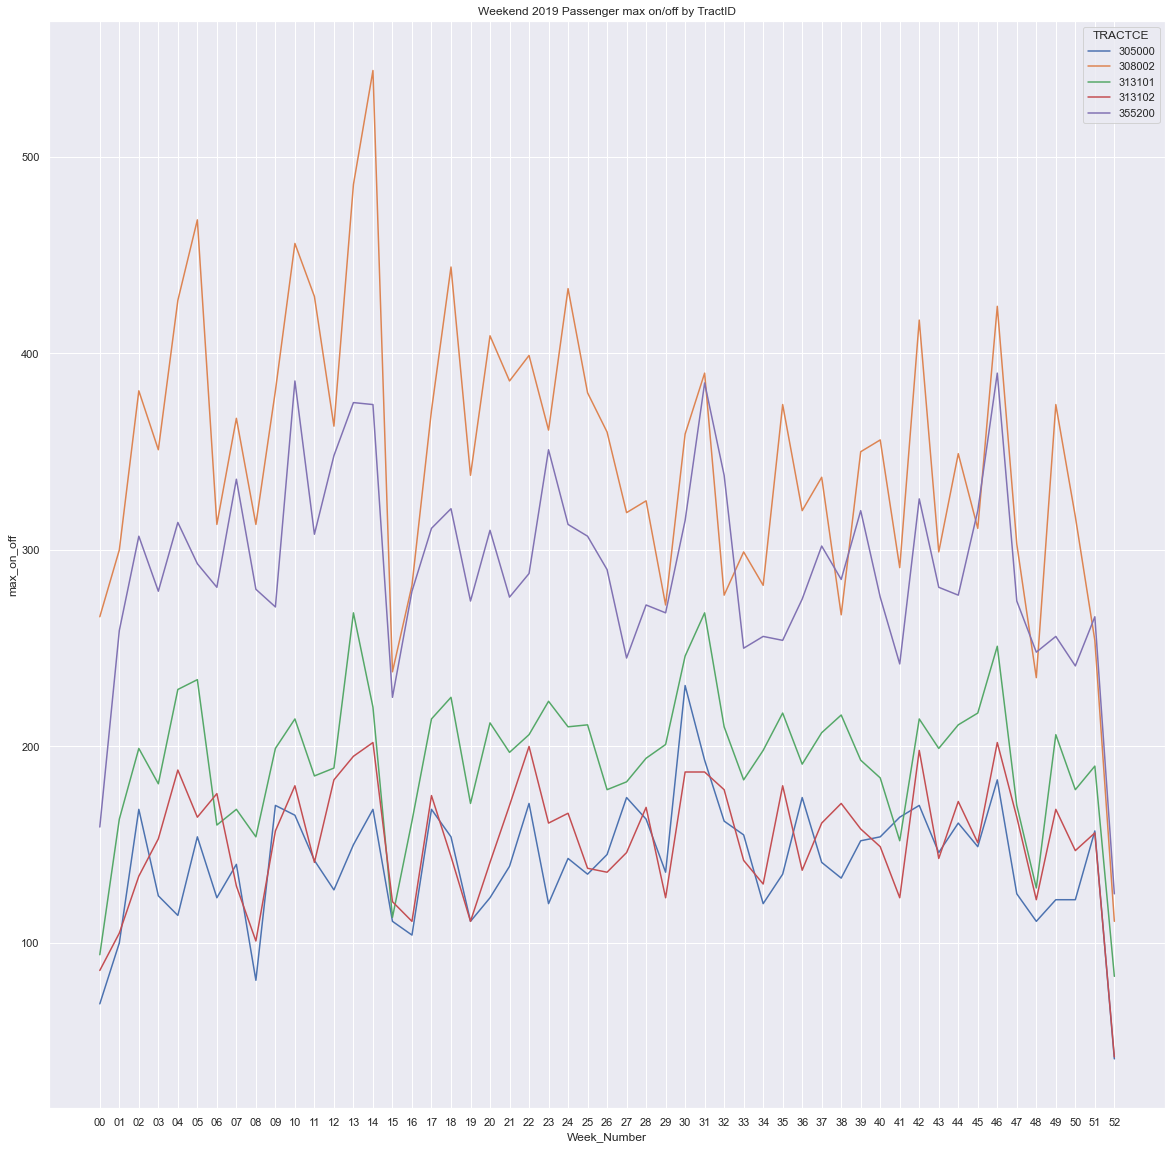

In [23]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1)
sns.color_palette("hls")
passenger_2019_weekend_on_off_max_grouped['TRACTCE'] = passenger_2019_weekend_on_off_max_grouped['TRACTCE'].astype(str)
sns.lineplot(data=passenger_2019_weekend_on_off_max_grouped, x="Week_Number", y="max_on_off", hue="TRACTCE").set(title='Weekend 2019 Passenger max on/off by TractID')